# Load the data

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Ex. 1

In [15]:
from sklearn.neighbors import KNeighborsClassifier 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9688

## Hyper parameters tuning

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

grid_knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(grid_knn_clf, param_grid, cv=5)

grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [17]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [18]:
grid_search.best_score_

0.9441999999999998

In [19]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

In [35]:
grid_search.predict(X_test[0].reshape(1, -1))

array(['7'], dtype=object)

# Ex. 2

In [57]:
import numpy as np

def shift_function(image : np.ndarray, direction : str = 'right'):
    if direction == 'right':
        return np.roll(image, 1, axis=1)
    elif direction == 'left':
        return np.roll(image, -1, axis=1)
    elif direction == 'down':
        return np.roll(image, 1, axis=0)
    elif direction == 'up':
        return np.roll(image, -1, axis=0)

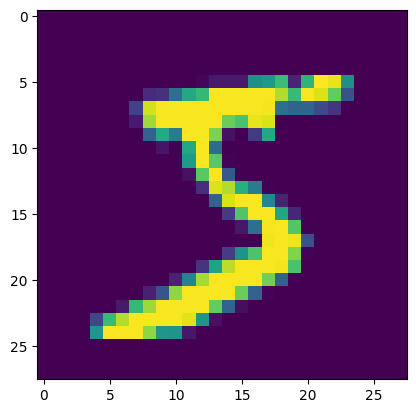

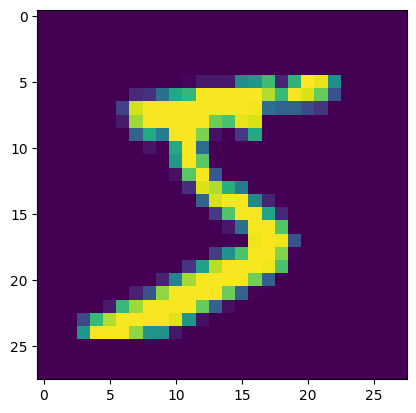

In [59]:
import matplotlib.pyplot as plt

# plt.imshow(shift_function(X[0], 'up'))
plt.imshow(X[0].reshape(28, 28))
plt.show()

plt.imshow(shift_function(X[0].reshape(28, 28), 'left'))
plt.show()

In [76]:
directions = ['up', 'down', 'right', 'left']

X_copy = X_train.copy()
for image in X_train[:5]:
    for direction in directions:
        img = shift_function(image.reshape(28, 28), direction)
        np.append(X_copy, img.reshape(-1, ))
        print(X_copy.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)


In [64]:
print(X_copy.shape)

(60000, 784)
